In [1]:
import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt

train_data_dir = "train"
validation_data_dir = "val"
img_width, img_height = 224, 224
model_name = 'resnet50_1.h5'

model = keras.models.load_model(model_name)
model.summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

Found 25249 images belonging to 2 classes.


array([ 0.0808524 ,  0.07159002,  0.12908727,  0.4939245 ,  0.02476138,
        0.71277201,  0.88137257,  0.00927581], dtype=float32)

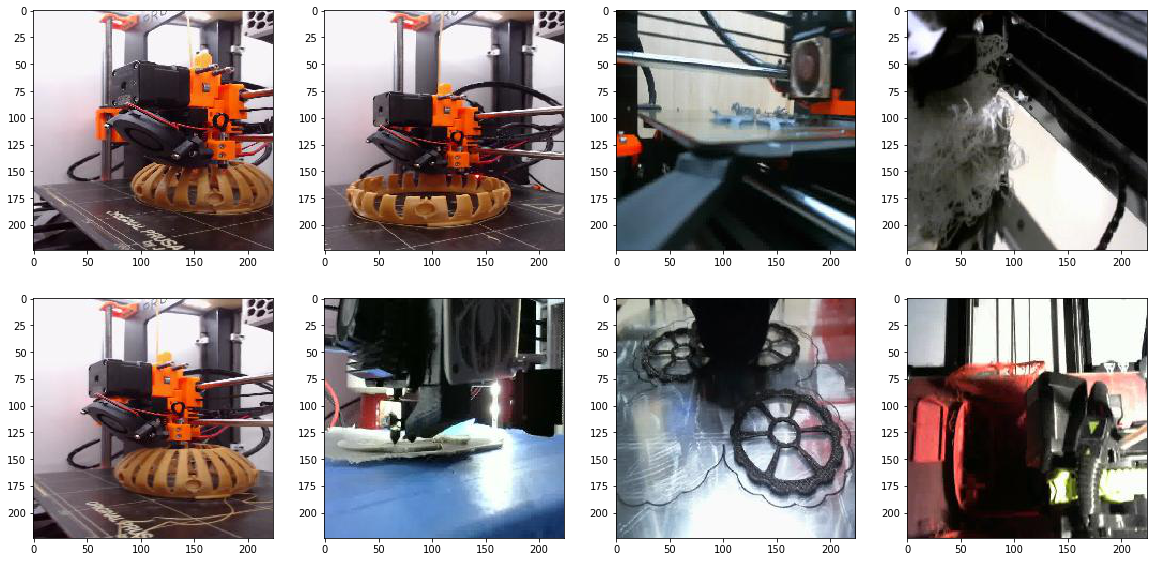

In [15]:
test_datagen = ImageDataGenerator(
rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = 8,
class_mode = "categorical")

imgs = validation_generator.next()[0]

plt.figure(figsize=(20,15))
columns = 4
for i in range(len(imgs)):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(imgs[i])
    
model.predict(imgs)[:,1]

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )/255.0
    return data

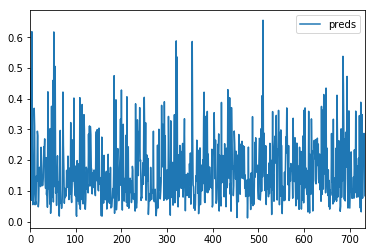

In [12]:
import matplotlib.image as mpimg
import glob

prefix = '526316004'
folder = 'val/good/'

plt.figure(figsize=(20,20))
columns = 16

jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()
# for i, img_path in enumerate(jpgs):
#     plt.subplot(len(jpgs) / columns + 1, columns, i + 1)
#     plt.imshow(mpimg.imread(img_path))

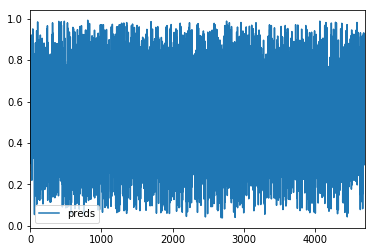

In [13]:
folder = 'val/spaghetti/'
jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()